# <center>Post Categoristion</center>
___

## Imports

In [1]:
# Data Structures
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

# Parsers
from bs4 import BeautifulSoup

# Feature Engineering
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Pipeline
from sklearn.pipeline import Pipeline

# Cross Validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Scoring
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

/Library/Python/2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Data

Import the data from the CSV file and assign column names for easy and intuitive access.

In [2]:
data = pd.read_csv('../data/dataset.csv', header=None, names=['Post', 'Category'])

We factorize the category attribute to produce integer labels instead of text labels.

In [3]:
data['Category'], categories = pd.factorize(data.Category)

In [4]:
categories = pd.DataFrame(categories, columns=['Category'])

### Data Visualisation

In [5]:
categories

,Category
0,Arts
1,Business
2,Education
3,Games
4,Health
5,Home
6,News
7,Recreation
8,Science
9,Shopping


Here we can see the number of samples for each category. Some categories are more popular, such as Arts, and have more posts whereas others are not as popular, such as Shopping, and have less posts.

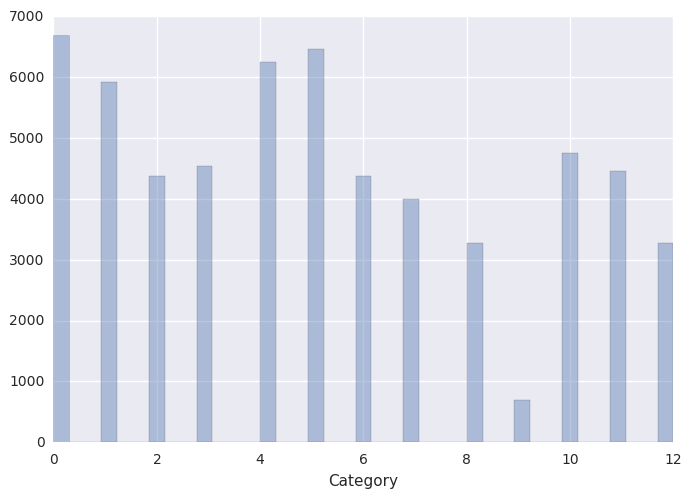

In [6]:
sns.distplot(data.Category, kde=False);

There are a lot of instances (6176) with short posts (less than 20 characters).

In [7]:
data[data.Post.str.len() <= 20].head()

,Post,Category
15,love song pandora,0
34,onceuponatime,0
75,new album soon carey,0
89,cudi kid,0
91,mother god,0


If we plot the categories of the posts with short text content, besides the Science and Technology categories,  it is mostly evenly distributed.

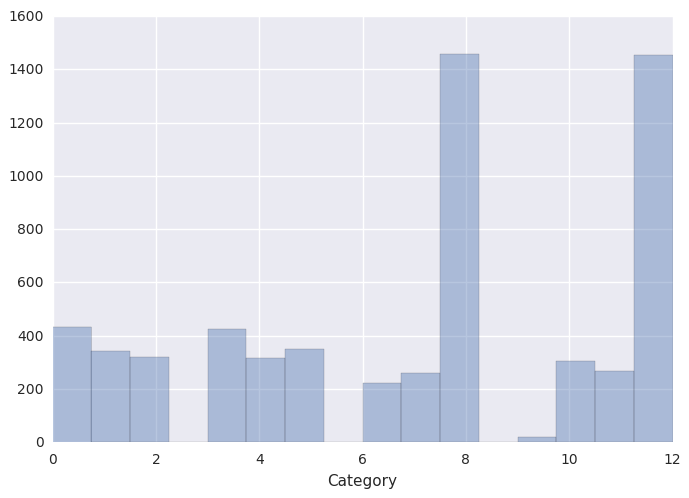

In [9]:
sns.distplot(data[data.Post.str.len() <= 20].Category, kde=False)

### Data Filtering

We take the samples which have text that is at least 20 characters long.

In [10]:
data = data[data.Post.str.len() > 20].reset_index(drop=True)

### Data Splitting

In [11]:
train, test = train_test_split(data, test_size = 0.2)

## Model

In [12]:
pipeline = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
                      ('tfidf', TfidfTransformer(use_idf=True)),
                      ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, n_iter=10, random_state=42))])

### Training

In [13]:
pipeline = pipeline.fit(train.Post, train.Category.values)

### Predicting

In [17]:
predictions = pipeline.predict(test.Post)

### Scoring

In [28]:
print(classification_report(test.Category.values, predictions))
print(accuracy_score(test.Category.values, predictions))

             precision    recall  f1-score   support

          0       0.59      0.53      0.56      1285
          1       0.58      0.55      0.57      1166
          2       0.57      0.55      0.56       784
          3       0.67      0.82      0.73       828
          4       0.59      0.78      0.67      1189
          5       0.62      0.81      0.70      1212
          6       0.46      0.23      0.30       853
          7       0.81      0.72      0.76       765
          8       0.60      0.38      0.46       320
          9       0.79      0.33      0.46       128
         10       0.55      0.50      0.53       862
         11       0.62      0.76      0.68       824
         12       0.63      0.41      0.50       351

avg / total       0.61      0.61      0.60     10567

0.61076937636


Here we can see the right to wrong prediction ratio for each category.

In [31]:
test.Category[test.Category == predictions].value_counts() / test.Category[test.Category != predictions].value_counts()

0     1.120462
1     1.233716
2     1.208451
3     4.520000
4     3.626459
5     4.246753
6     0.294385
7     2.541667
8     0.608040
9     0.488372
10    1.018735
11    3.140704
12    0.703883
Name: Category, dtype: float64

The graph below shows the distribution of incorrect predictions for each category. We can see that category 6 (News) has the most inaccurate predictions despite having a low number of samples.

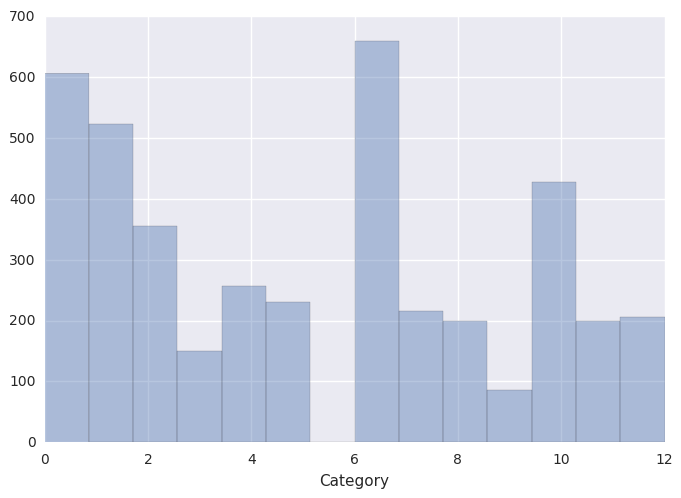

In [27]:
sns.distplot(test.Category[test.Category != predictions], kde=False)